# Import Library

Pada tahap ini, kita mengimpor pustaka yang diperlukan untuk pemrosesan data, visualisasi, dan pembuatan model pembelajaran mesin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data loading

Pada tahap ini, kita memuat dataset yang akan digunakan dalam proyek ini

In [ ]:
# load the dataset
fileCSV = '/content/StudentPerformanceFactors.csv'
df = pd.read_csv(fileCSV)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Exploratory Data Analysis (EDA)



## EDA Deskripsi Variabel

Pada tahap ini, kita melakukan eksplorasi data untuk memahami struktur dataset seperti jumlah baris, kolom, tipe data, dan jumlah nilai non-null pada setiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Selanjutnya, kita akan melihat statistik deskriptif dari dataset seperti nilai rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum dari data numerik

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## EDA Menangani Missing Value

Mengecek apakah ada nilai yang hilang pada setiap kolom. Langkah ini penting untuk mengetahui apakah ada data yang perlu diisi atau dihapus

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Menghapus baris yang memiliki nilai kosong (null) dari dataset dan untuk langsung menghapus nilai null tanpa membuat salinan data. Hal ini dilakukan agar analisis lebih akurat dan tidak bias akibat data yang hilang

In [ ]:
df.dropna(inplace=True)

Perintah di bawah ini digunakan untuk menghitung jumlah nilai null (hilang) pada setiap kolom dataset

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


## EDA Mendeteksi/Menangani Outliers

Visualisasi distribusi variabel **Hours_Studied** menggunakan boxplot. Perintah ini digunakan untuk menggambarkan penyebaran data serta mendeteksi outlier pada variabel tersebut

<Axes: xlabel='Hours_Studied'>

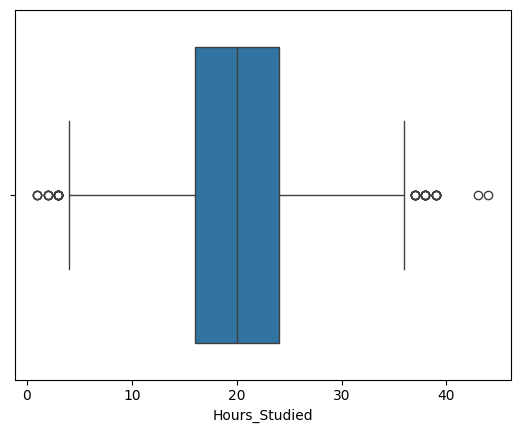

In [ ]:
sns.boxplot(x=df['Hours_Studied'])

Visualisasi distribusi variabel **Attendance** menggunakan boxplot. Perintah ini digunakan untuk menggambarkan penyebaran data serta mendeteksi outlier pada variabel tersebut

<Axes: xlabel='Attendance'>

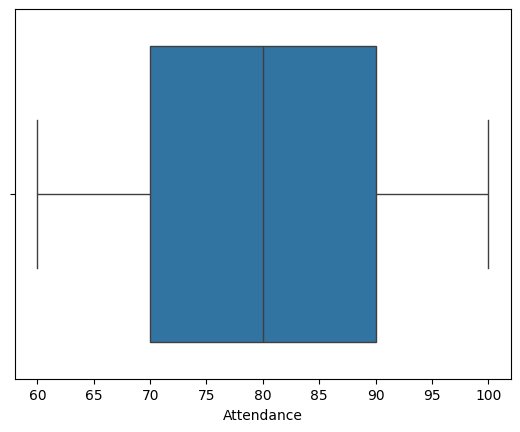

In [ ]:
sns.boxplot(x=df['Attendance'])

Visualisasi distribusi variabel **Sleep_Hours** menggunakan boxplot. Perintah ini digunakan untuk menggambarkan penyebaran data serta mendeteksi outlier pada variabel tersebut

<Axes: xlabel='Sleep_Hours'>

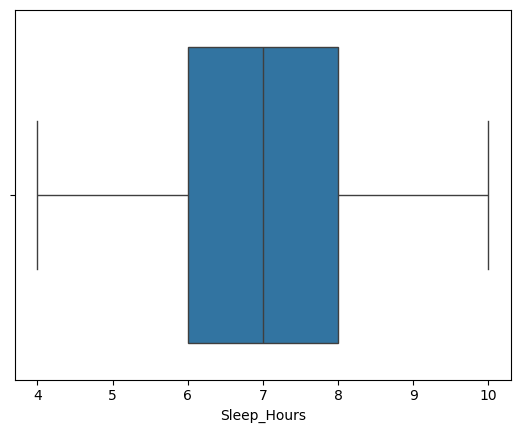

In [ ]:
sns.boxplot(x=df['Sleep_Hours'])

Visualisasi distribusi variabel **Previous_Scores** menggunakan boxplot. Perintah ini digunakan untuk menggambarkan penyebaran data serta mendeteksi outlier pada variabel tersebut

<Axes: xlabel='Previous_Scores'>

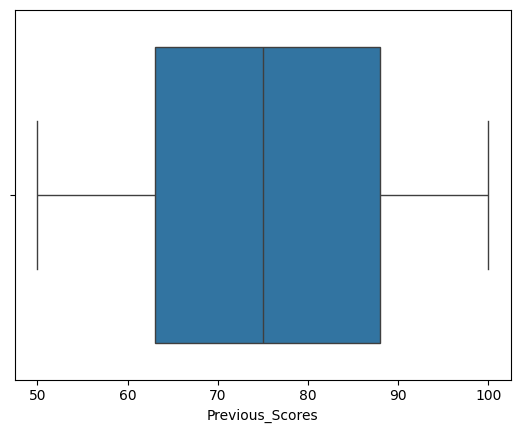

In [ ]:
sns.boxplot(x=df['Previous_Scores'])

Visualisasi distribusi variabel **Tutoring_Sessions** menggunakan boxplot. Perintah ini digunakan untuk menggambarkan penyebaran data serta mendeteksi outlier pada variabel tersebut

<Axes: xlabel='Tutoring_Sessions'>

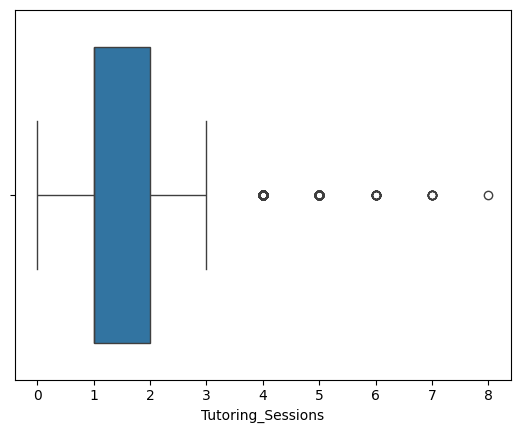

In [ ]:
sns.boxplot(x=df['Tutoring_Sessions'])

Visualisasi distribusi variabel **Physical_Activity** menggunakan boxplot. Perintah ini digunakan untuk menggambarkan penyebaran data serta mendeteksi outlier pada variabel tersebut

<Axes: xlabel='Physical_Activity'>

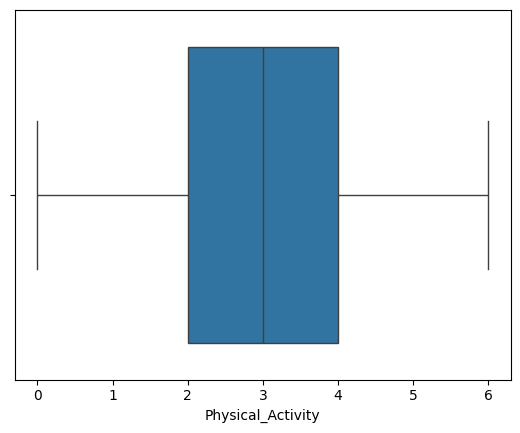

In [ ]:
sns.boxplot(x=df['Physical_Activity'])

Visualisasi distribusi variabel **Exam_Score** menggunakan boxplot. Perintah ini digunakan untuk menggambarkan penyebaran data serta mendeteksi outlier pada variabel tersebut

<Axes: xlabel='Exam_Score'>

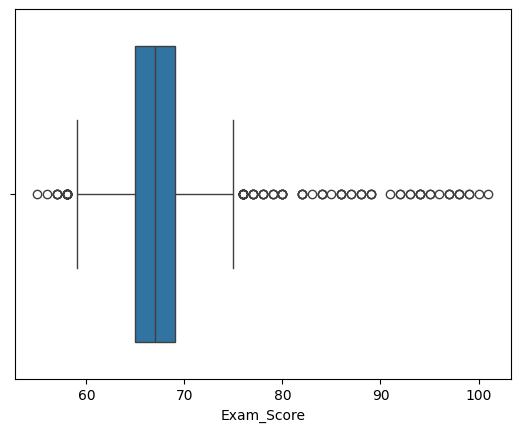

In [ ]:
sns.boxplot(x=df['Exam_Score'])

Tidak dilakukan penanganan outliers dikarenakan bisa saja hal tersebut benar benar terjadi pada seorang siswa

## EDA Univariate Analysis



Mendefinisikan fitur numerik dan kategorikal dalam dataset. Langkah ini dilakukan agar proses pra-pemrosesan lebih terstruktur

In [ ]:
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

### Numerical Features

Visualisasi distribusi data numerik menggunakan histogram. Histogram ini juga membantu kita melihat distribusi data, mendeteksi skewness, dan melihat variasi antar fitur

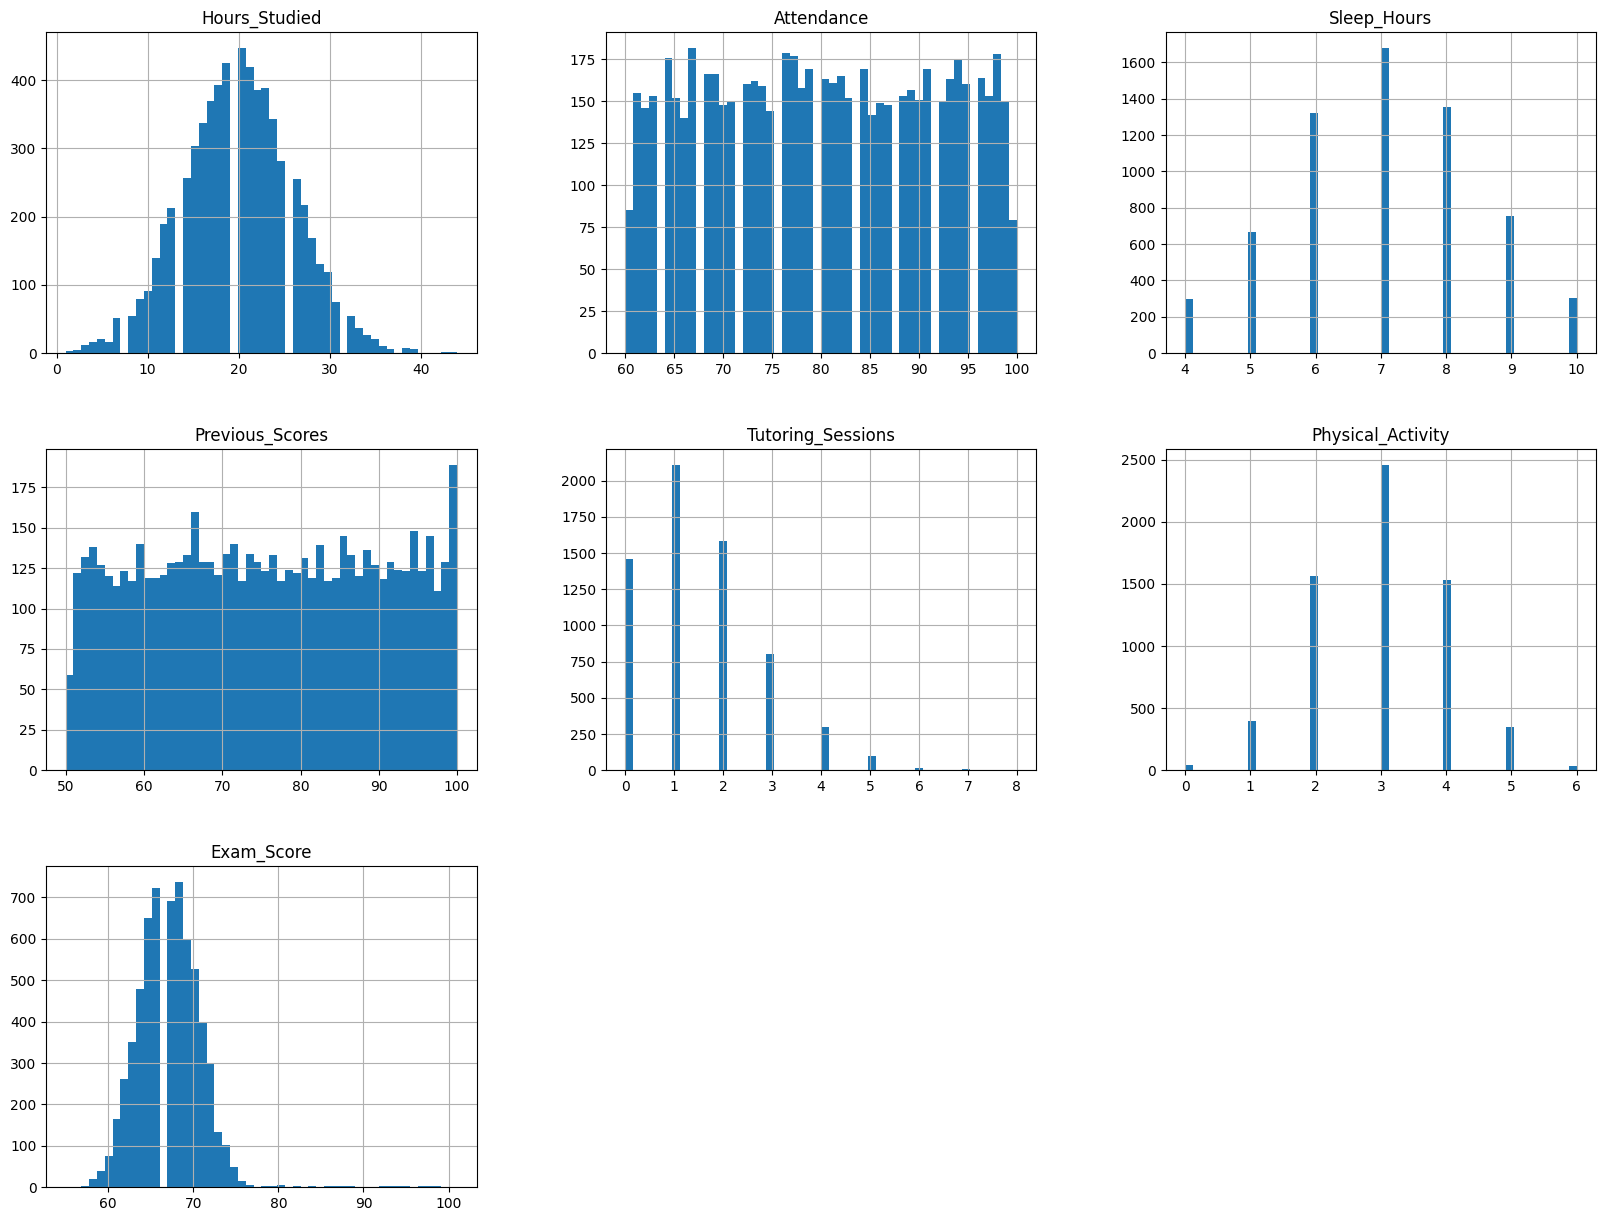

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Categorical Features

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Parental_Involvement** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                      jumlah sampel  persentase
Parental_Involvement                           
Medium                         3251        51.0
High                           1836        28.8
Low                            1291        20.2


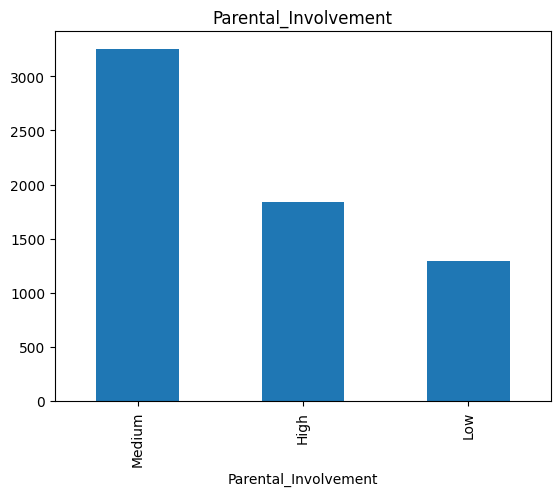

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_parental_involvement = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_parental_involvement)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Access_to_Resources** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                     jumlah sampel  persentase
Access_to_Resources                           
Medium                        3204        50.2
High                          1900        29.8
Low                           1274        20.0


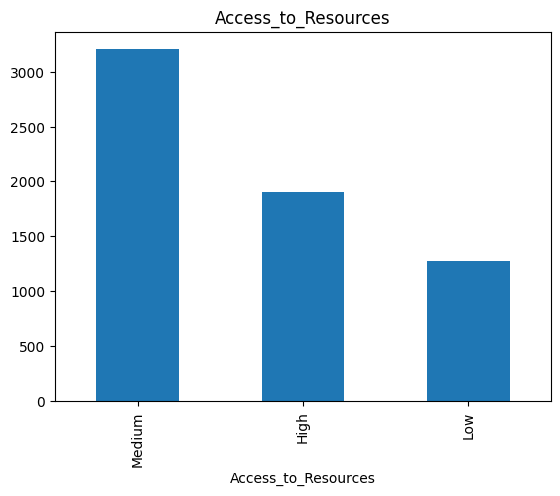

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Access_to_Resources = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Access_to_Resources)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Extracurricular_Activities** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                            jumlah sampel  persentase
Extracurricular_Activities                           
Yes                                  3807        59.7
No                                   2571        40.3


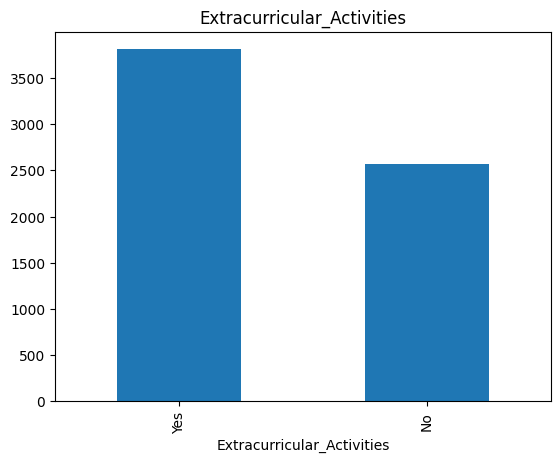

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Extracurricular_Activities = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Extracurricular_Activities)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Motivation_Level** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                  jumlah sampel  persentase
Motivation_Level                           
Medium                     3237        50.8
Low                        1864        29.2
High                       1277        20.0


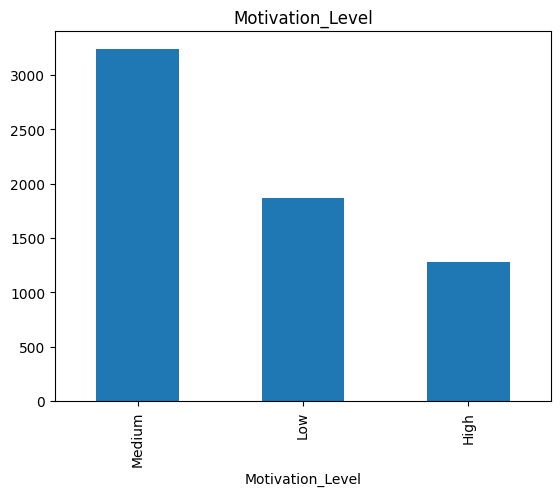

In [ ]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Motivation_Level = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Motivation_Level)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Internet_Access** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                 jumlah sampel  persentase
Internet_Access                           
Yes                       5893        92.4
No                         485         7.6


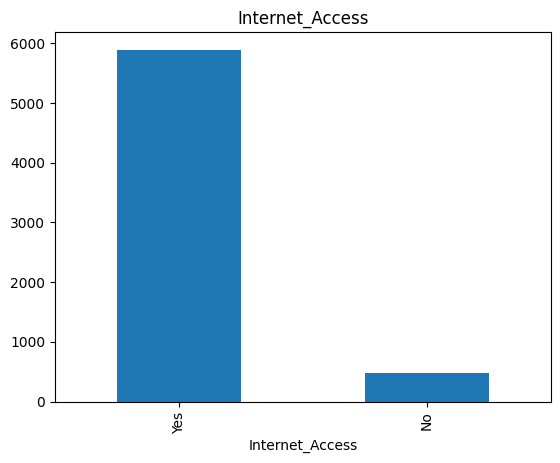

In [ ]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Internet_Access = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Internet_Access)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Family_Income** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

               jumlah sampel  persentase
Family_Income                           
Low                     2582        40.5
Medium                  2566        40.2
High                    1230        19.3


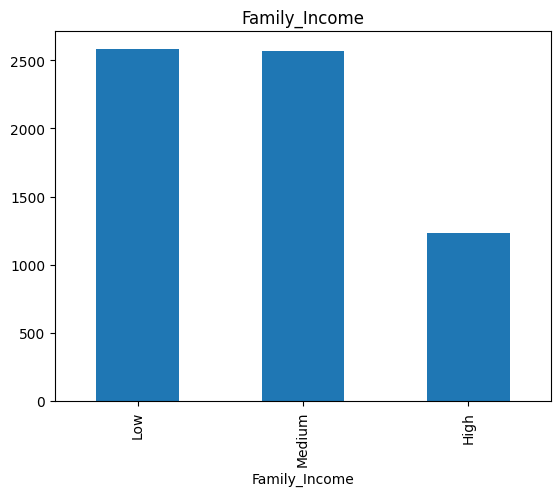

In [ ]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Family_Income = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Family_Income)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Teacher_Quality** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                 jumlah sampel  persentase
Teacher_Quality                           
Medium                    3826        60.0
High                      1905        29.9
Low                        647        10.1


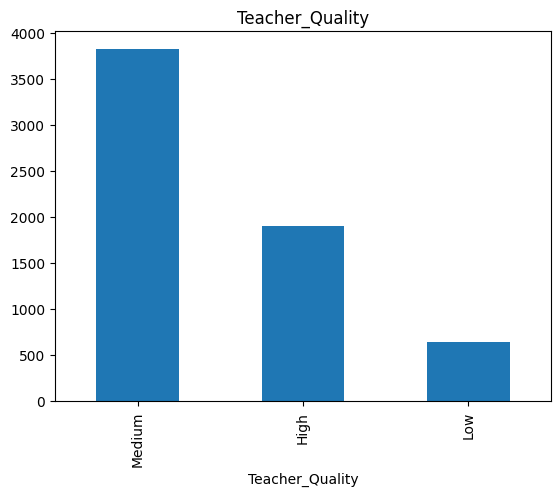

In [ ]:
feature = categorical_features[6]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Teacher_Quality	 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Teacher_Quality)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **School_Type** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

             jumlah sampel  persentase
School_Type                           
Public                4434        69.5
Private               1944        30.5


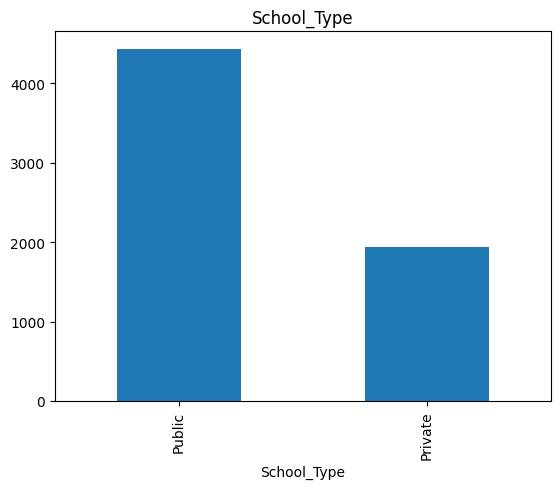

In [ ]:
feature = categorical_features[7]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_School_Type	 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_School_Type)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Peer_Influence** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                jumlah sampel  persentase
Peer_Influence                           
Positive                 2553        40.0
Neutral                  2495        39.1
Negative                 1330        20.9


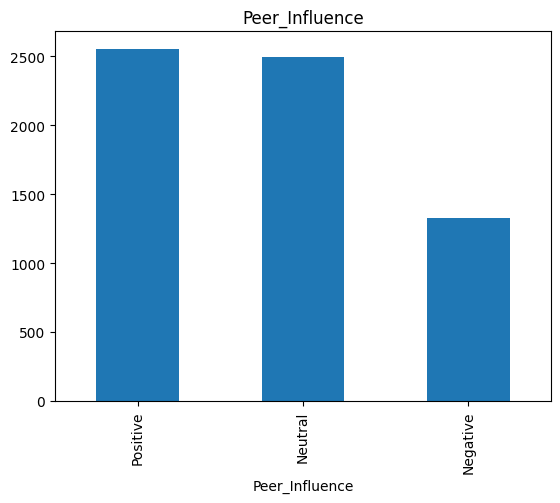

In [ ]:
feature = categorical_features[8]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Peer_Influence	 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Peer_Influence)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Learning_Disabilities** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                       jumlah sampel  persentase
Learning_Disabilities                           
No                              5710        89.5
Yes                              668        10.5


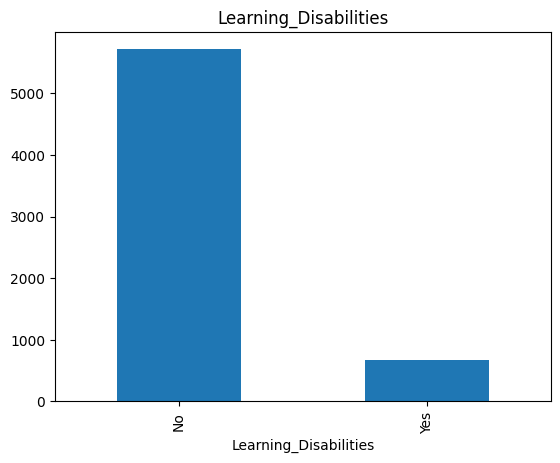

In [ ]:
feature = categorical_features[9]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Learning_Disabilities	 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Learning_Disabilities)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Parental_Education_Level** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                          jumlah sampel  persentase
Parental_Education_Level                           
High School                        3159        49.5
College                            1939        30.4
Postgraduate                       1280        20.1


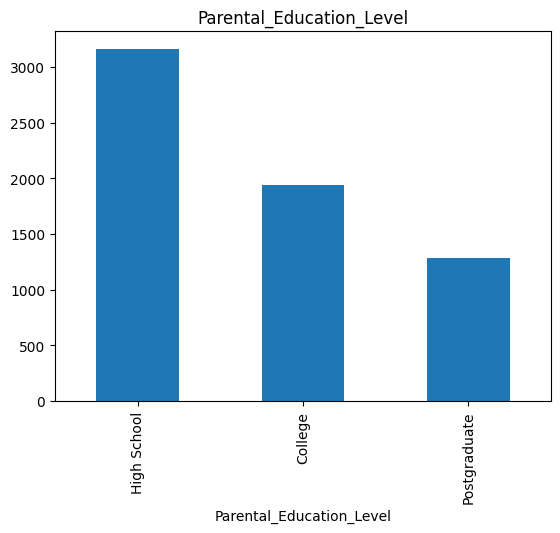

In [ ]:
feature = categorical_features[10]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Parental_Education_Level	 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Parental_Education_Level)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Distance_from_Home** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

                    jumlah sampel  persentase
Distance_from_Home                           
Near                         3801        59.6
Moderate                     1941        30.4
Far                           636        10.0


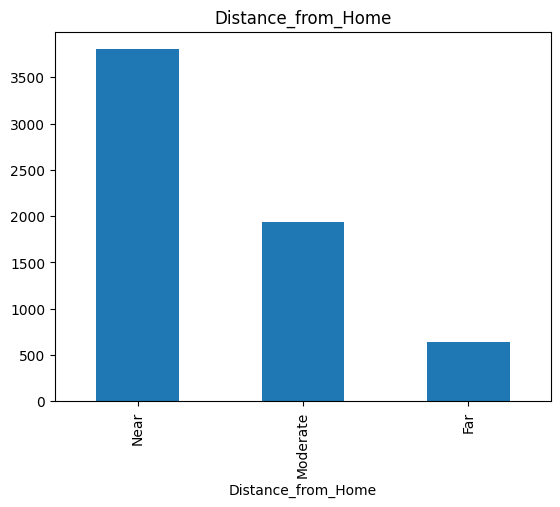

In [ ]:
feature = categorical_features[11]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Distance_from_Home	 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Distance_from_Home)
count.plot(kind='bar', title=feature);

Bagian ini memberi gambaran statistik deskriptif tentang fitur kategorikal **Gender** dan menyajikan visualisasi distribusi kategori dalam bentuk bar chart

        jumlah sampel  persentase
Gender                           
Male             3688        57.8
Female           2690        42.2


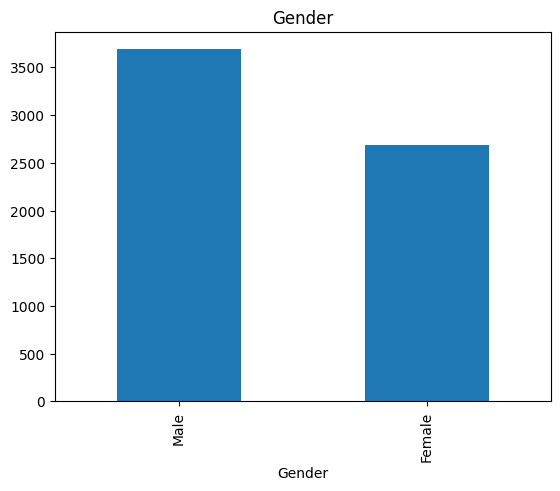

In [ ]:
feature = categorical_features[12]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_Gender	 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_Gender)
count.plot(kind='bar', title=feature);

## EDA Multivariate Analysis


### Numerical Features

Grafik ini membantu untuk melihat adanya pola atau hubungan antara variabel-variabel numerik, seperti korelasi linear atau non-linear

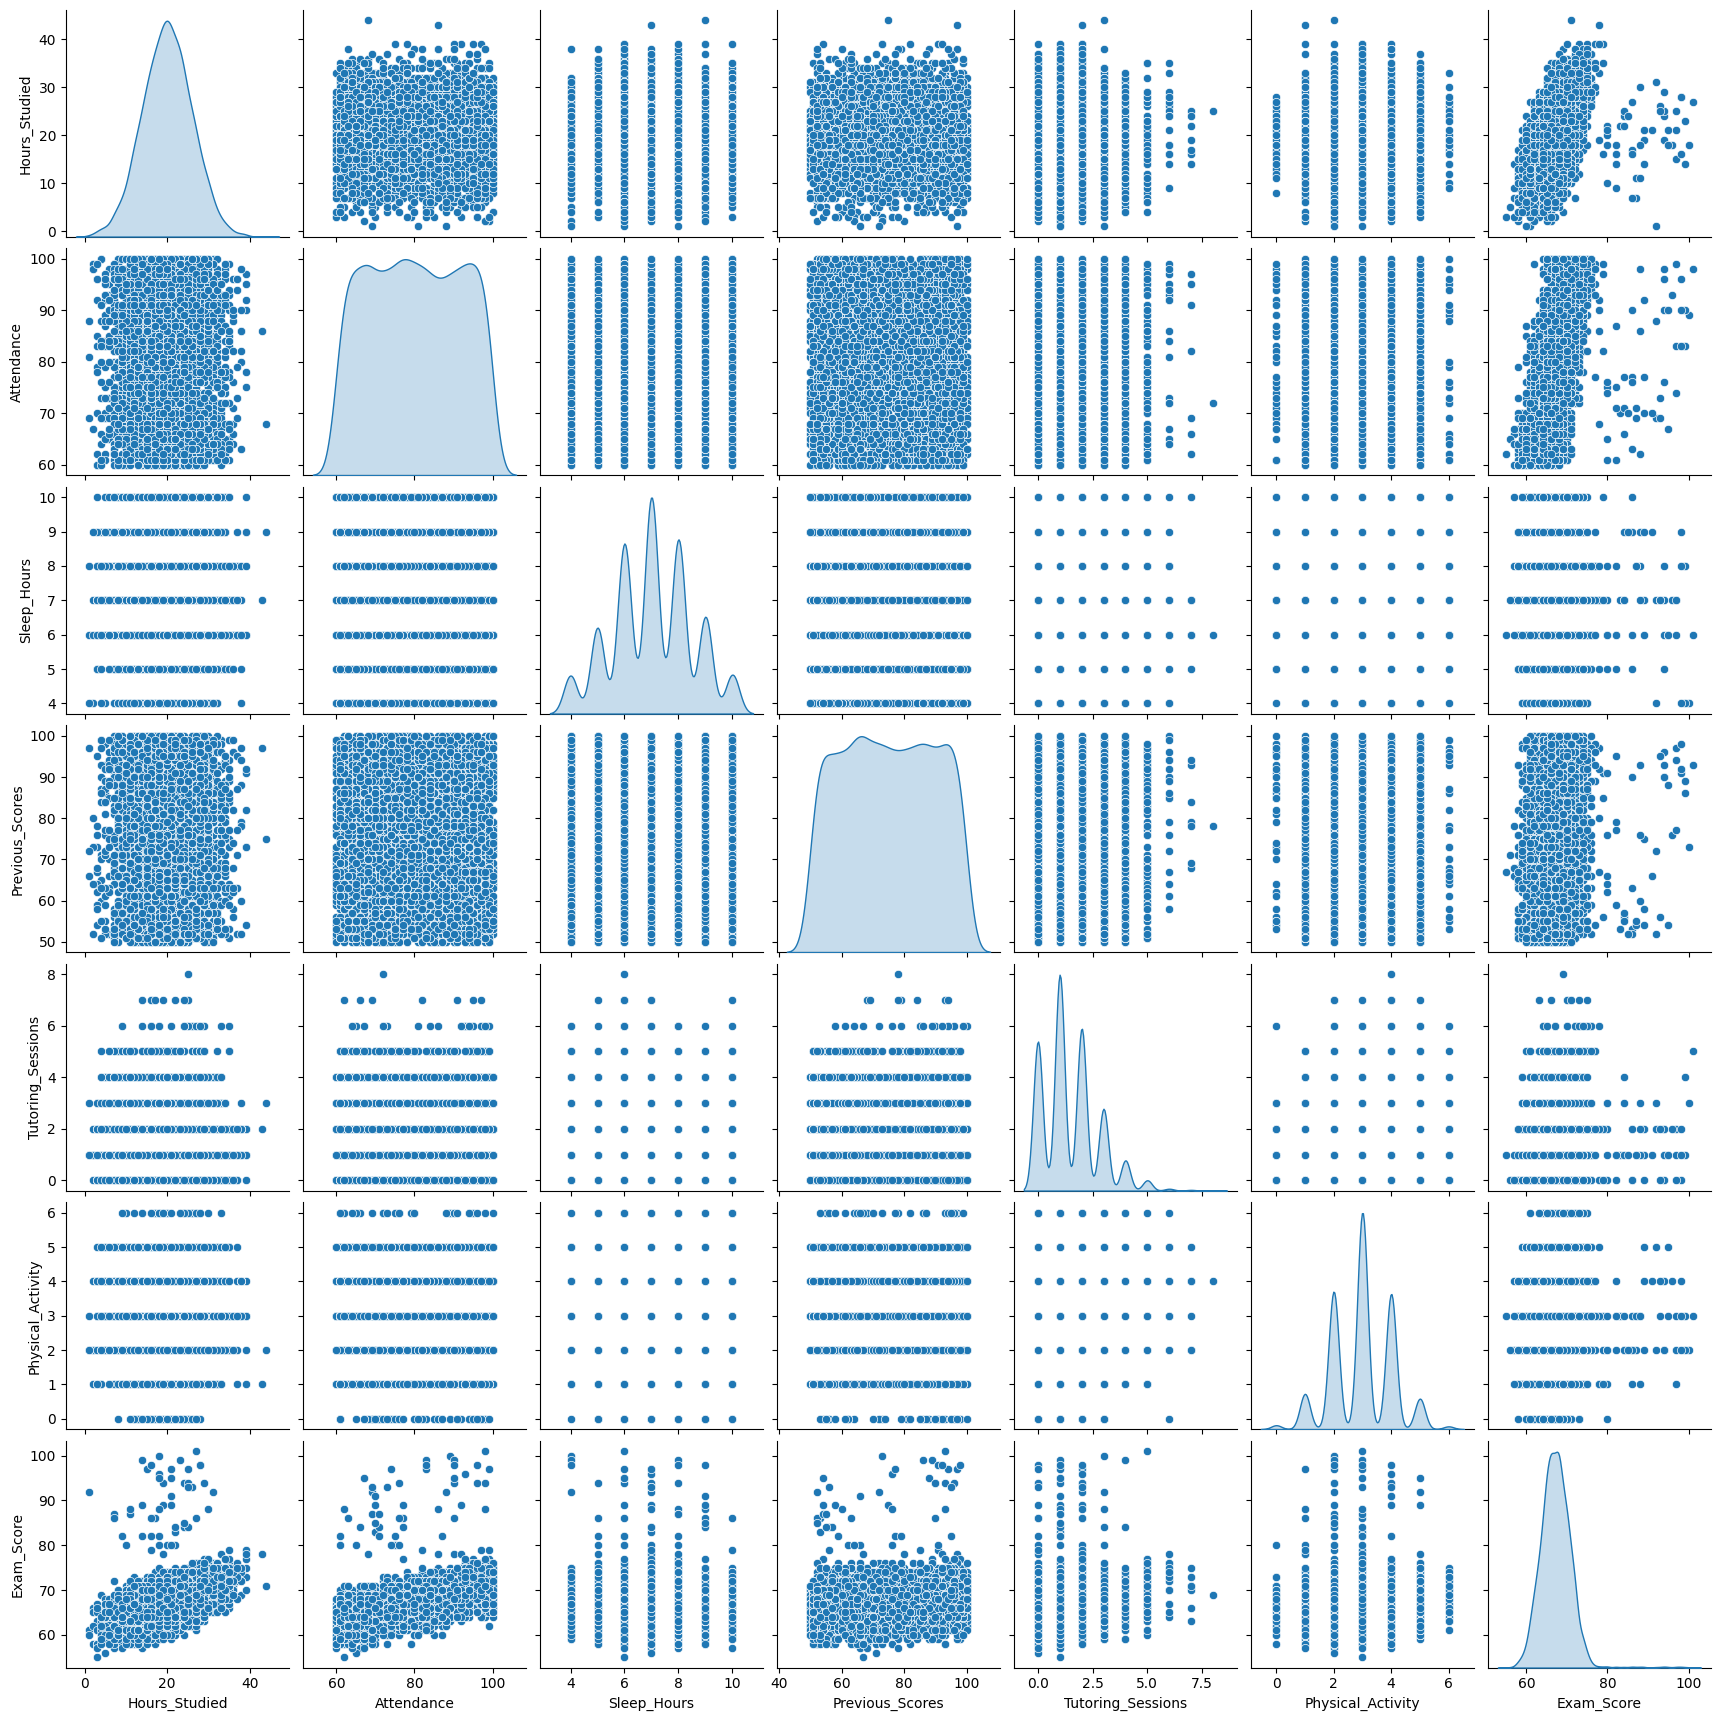

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

### Categorical Features

Ini memungkinkan kita untuk melihat bagaimana setiap kategori dalam fitur kategorikal mempengaruhi skor ujian siswa

<ipython-input-32-c916b0e4dcdd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-32-c916b0e4dcdd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-32-c916b0e4dcdd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-i

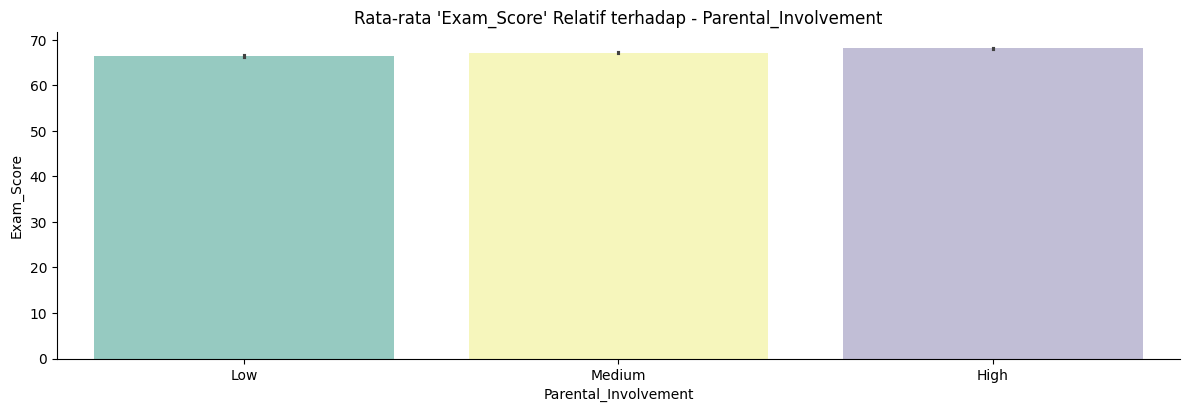

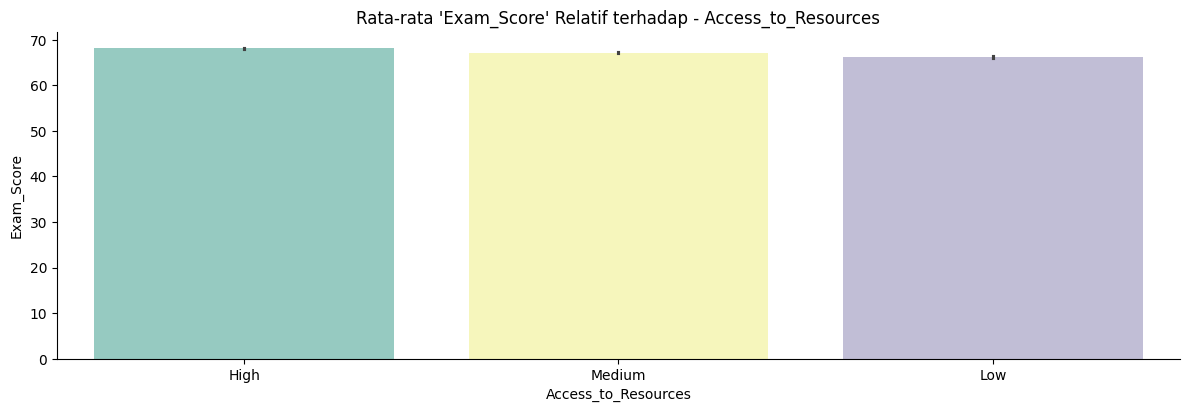

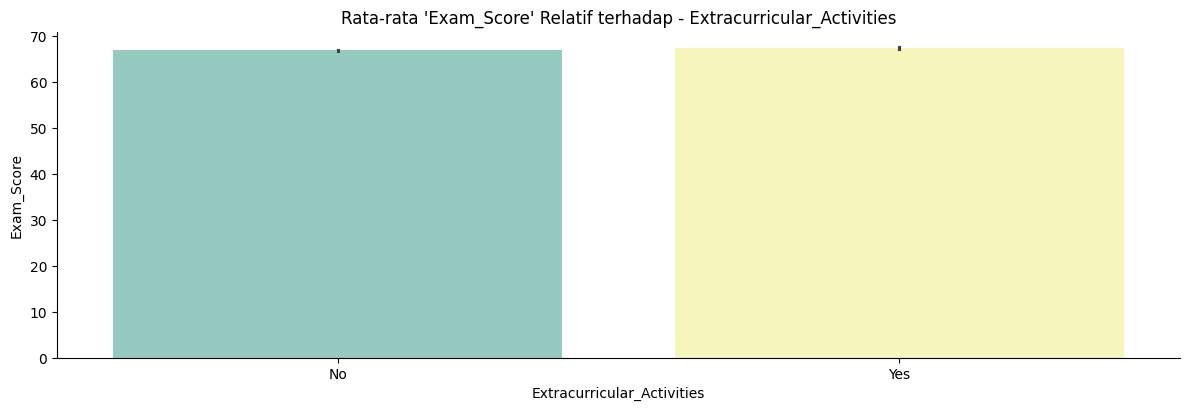

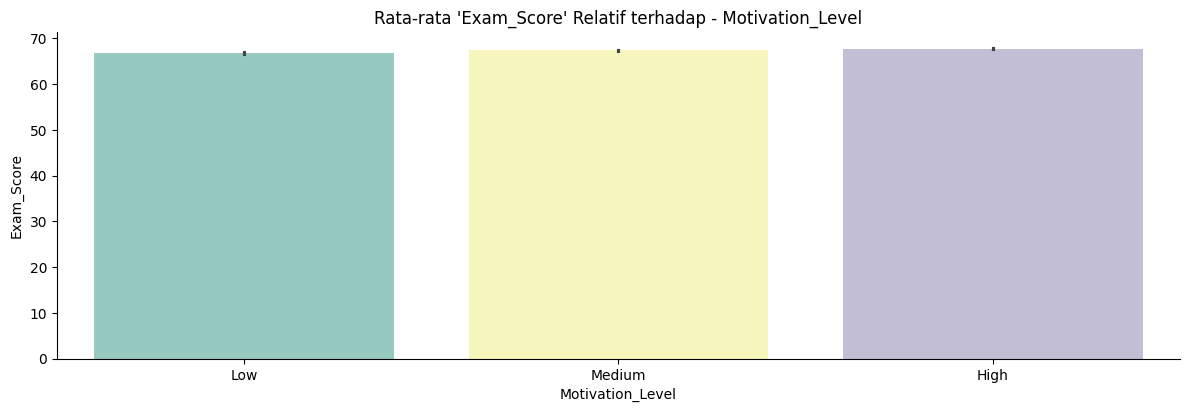

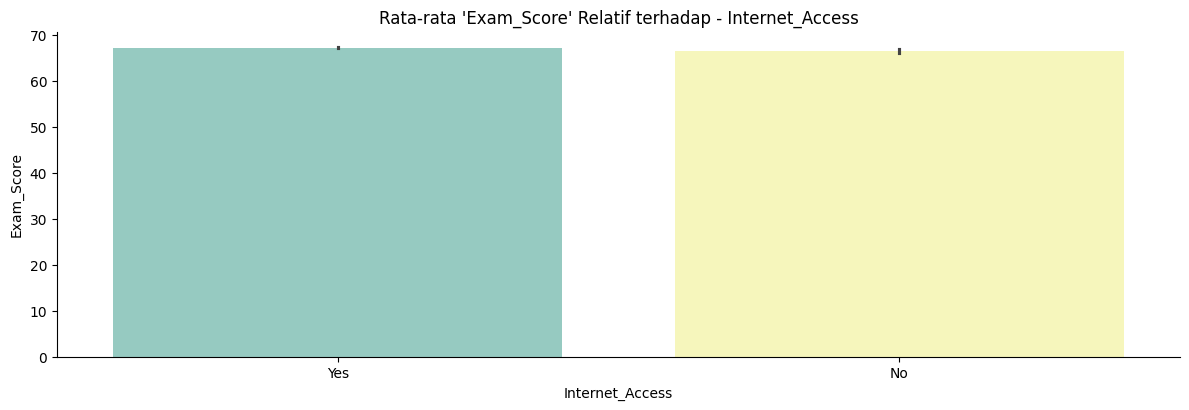

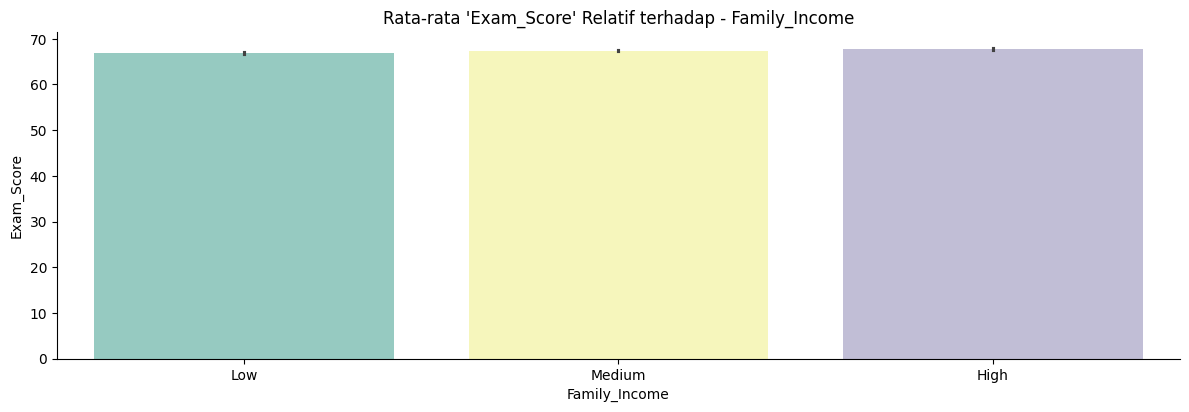

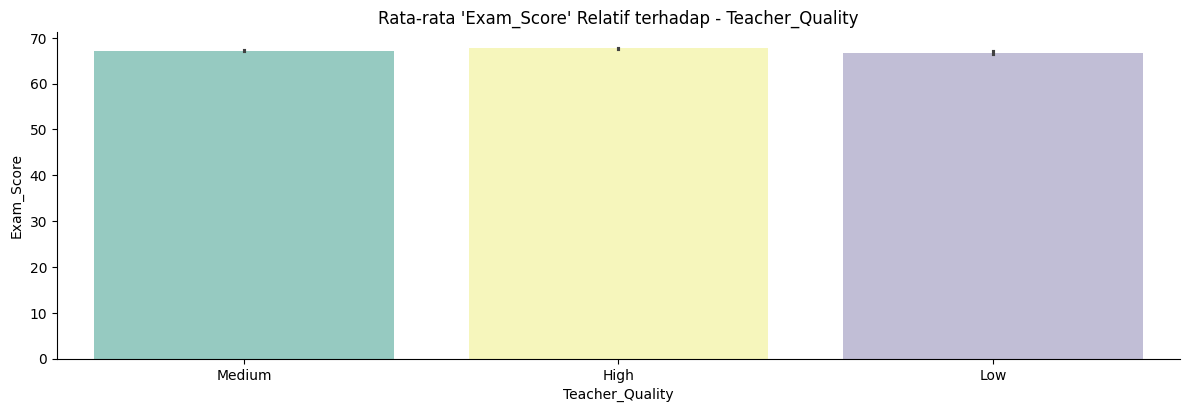

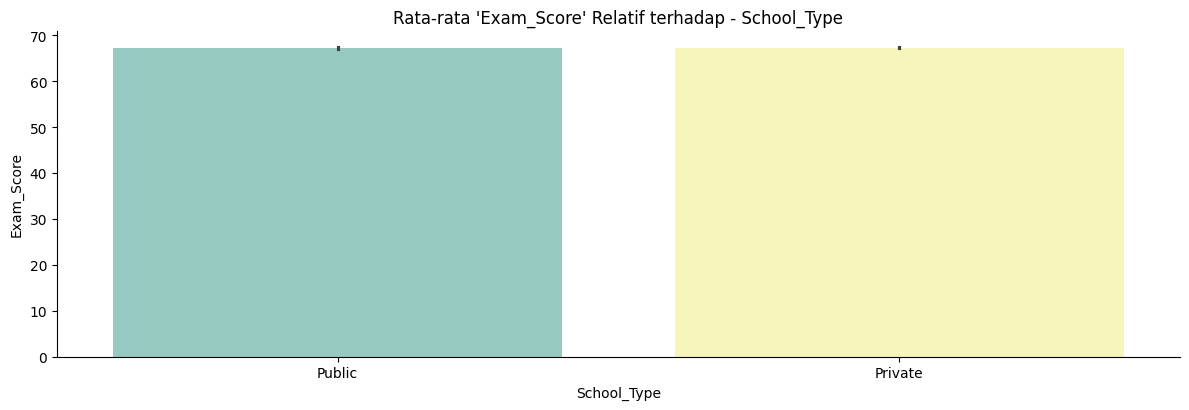

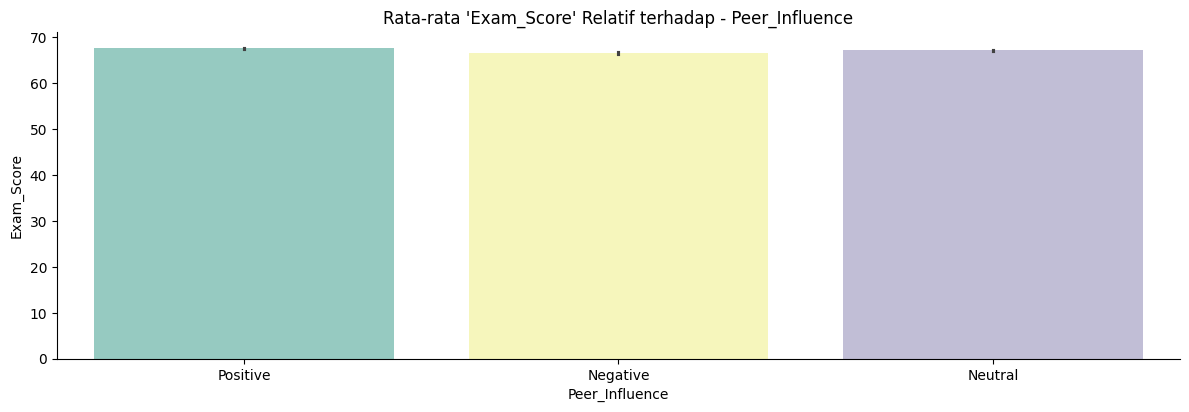

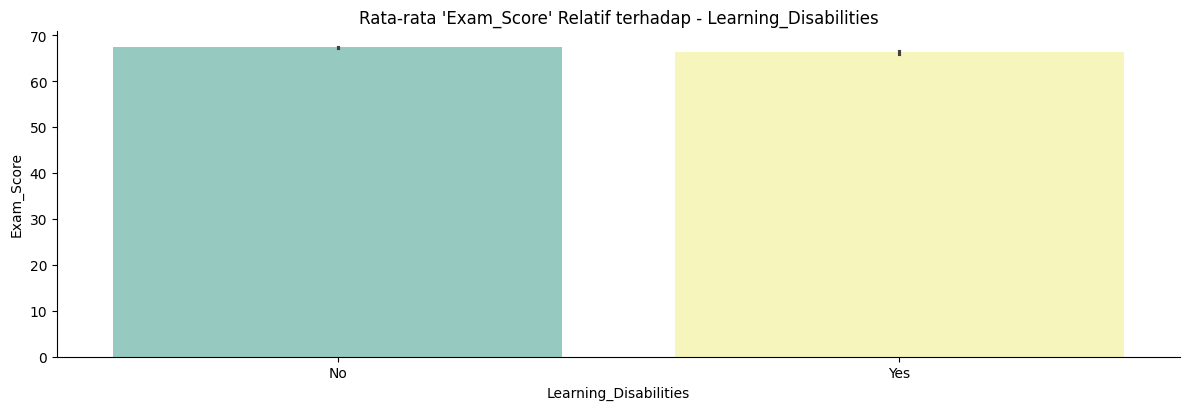

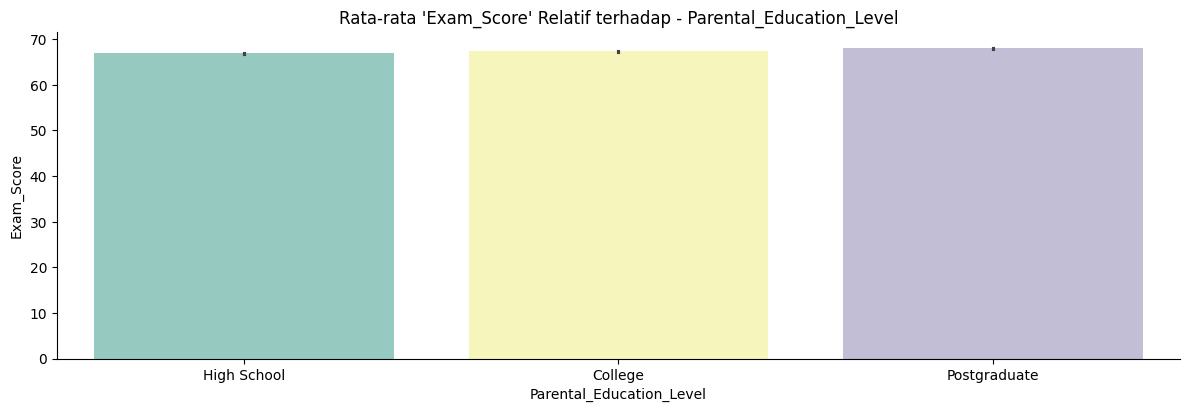

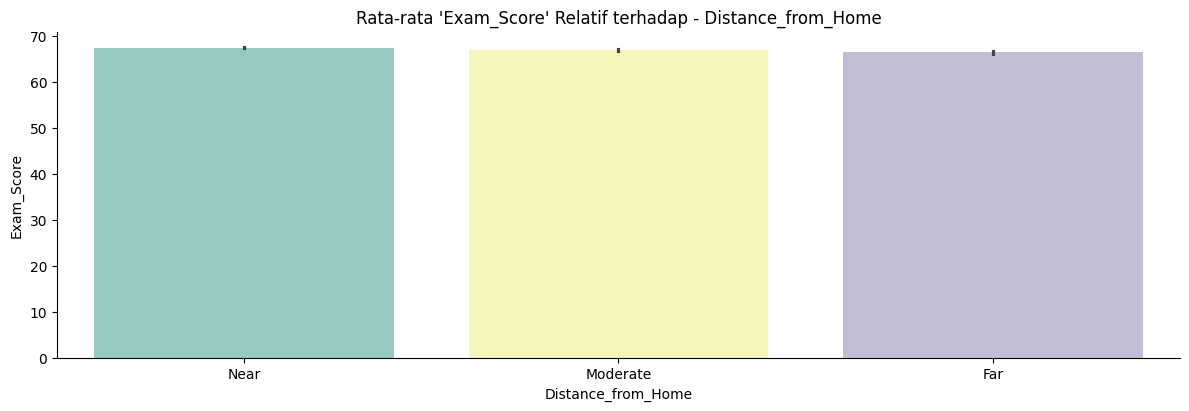

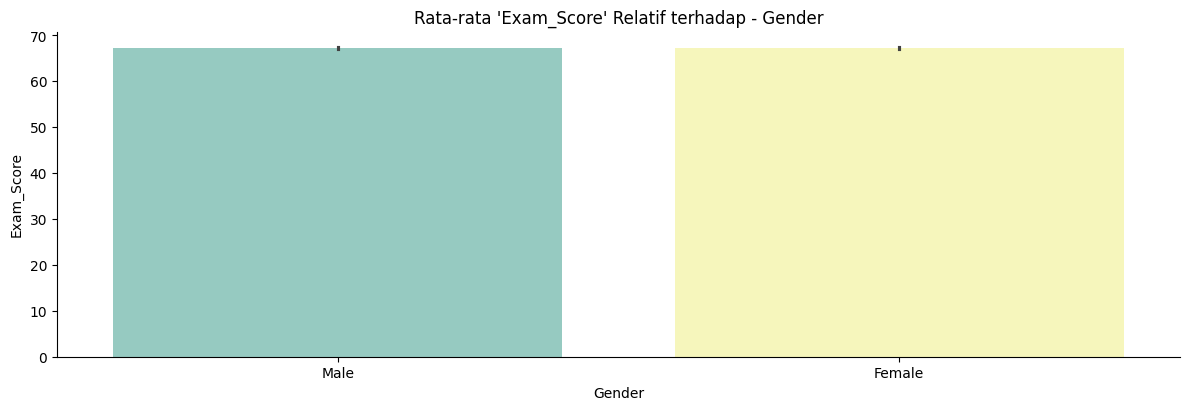

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Exam_Score' Relatif terhadap - {}".format(col))

### Correlation Matrix Fitur Numerik

Visualisasi matriks korelasi menggunakan heatmap untuk fitur numerik. Matriks korelasi membantu mengidentifikasi hubungan antar fitur. Warna yang lebih terang menunjukkan korelasi positif yang kuat, sedangkan warna gelap menunjukkan korelasi negatif


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

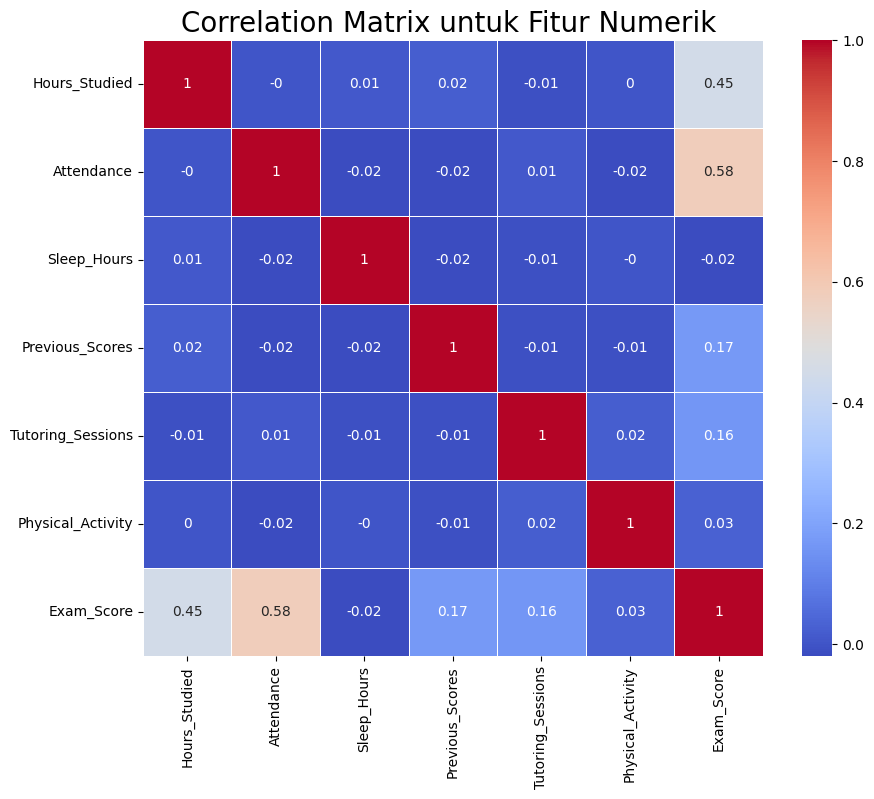

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Menghapus fitur numerik yang tidak berkorelasi dengan target (Exam_Score).
Fitur yang dihapus adalah Sleep_Hours, Previous_Scores, Tutoring_Sessions, dan Physical_Activity. Keputusan ini diambil karena korelasi antara fitur-fitur tersebut dengan target sangat lemah atau tidak signifikan

In [ ]:
df.drop(['Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'], inplace=True, axis=1)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male,67
1,19,64,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female,70


# Data Preparation

## Encoding Fitur Kategori

Pada tahap ini, kita melakukan encoding pada variabel kategorikal menggunakan teknik One-Hot Encoding. Encoding dilakukan agar model regresi dapat memanfaatkan data kategorikal dalam bentuk numerik. Setiap kategori dalam fitur akan diubah menjadi kolom baru dengan nilai biner (0 atau 1)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Parental_Involvement'], prefix='Parental_Involvement')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Access_to_Resources'], prefix='Access_to_Resources')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Extracurricular_Activities'], prefix='Extracurricular_Activities')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Motivation_Level'], prefix='Motivation_Level')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Internet_Access'], prefix='Internet_Access')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Family_Income'], prefix='Family_Income')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Teacher_Quality'], prefix='Teacher_Quality')],axis=1)
df = pd.concat([df, pd.get_dummies(df['School_Type'], prefix='School_Type')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Peer_Influence'], prefix='Peer_Influence')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Learning_Disabilities'], prefix='Learning_Disabilities')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Parental_Education_Level'], prefix='Parental_Education_Level')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Distance_from_Home'], prefix='Distance_from_Home')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender')],axis=1)
df.drop(df.select_dtypes(include='object').columns, axis=1, inplace=True)
df.head()

,Hours_Studied,Attendance,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_No,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,67,False,True,False,True,False,False,True,...,True,False,False,True,False,False,False,True,False,True
1,19,64,61,False,True,False,False,False,True,True,...,True,False,True,False,False,False,True,False,True,False
2,24,98,74,False,False,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,True
3,29,89,71,False,True,False,False,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,19,92,70,False,False,True,False,False,True,False,...,True,False,True,False,False,False,False,True,True,False


Mengubah tipe data boolean pada DataFrame di atas menjadi tipe data int

In [ ]:
df = df.astype(int)

Memperlihatkan hasil setelah diubah tipe data nya menjadi int pada kolom yang sebelumnya tipe data boolean

In [ ]:
df.head()

,Hours_Studied,Attendance,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_No,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,67,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,19,64,61,0,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,1,0
2,24,98,74,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
3,29,89,71,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,19,92,70,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0


## Train-Test-Split

Pada tahap ini, kita membagi dataset menjadi data pelatihan (training) dan data pengujian (testing). Variabel X berisi semua fitur kecuali **Exam_Score**, sementara y berisi target **Exam_Score**. Data dibagi dengan proporsi 90% untuk pelatihan dan 10% untuk pengujian menggunakan fungsi train_test_split

In [ ]:
X = df.drop(["Exam_Score"],axis =1)
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Menampilkan jumlah total data setelah dilakukan pembagian antara data pelatihan dan data uji menggunakan train_test_split

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 6378
Total # of sample in train dataset: 5740
Total # of sample in test dataset: 638


## Standarisasi

Pada tahap ini, kita melakukan standardisasi pada fitur numerik seperti **Hours_Studied** dan **Attendance** agar memiliki skala yang sama. StandardScaler digunakan untuk mengonversi fitur sehingga memiliki distribusi dengan mean=0 dan variance=1.

In [ ]:
numerical_features = ['Hours_Studied', 'Attendance']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Hours_Studied,Attendance
4267,-1.996069,-1.731933
266,1.684390,0.086565
1568,-1.494188,0.606136
4679,0.346041,0.606136
5039,0.346041,-0.606196


Pada tahap ini, kita akan melihat statistik deskriptif dari fitur numerik setelah dilakukan standardisasi

In [ ]:
X_train[numerical_features].describe().round(4)

,Hours_Studied,Attendance
count,5740.0000,5740.0000
mean,-0.0000,0.0000
std,1.0001,1.0001
min,-3.1671,-1.7319
25%,-0.6577,-0.8660
50%,0.0115,-0.0000
75%,0.6806,0.8659
max,4.0265,1.7319


# Model Development

## Model Development dengan Random Forest

Pada tahap ini, kita membangun model regresi menggunakan algoritma Random Forest.
Parameter yang digunakan dalam model ini antara lain:
- n_estimators=50: Jumlah pohon keputusan yang dibangun dalam model.
- max_depth=16: Kedalaman maksimum setiap pohon, untuk menghindari overfitting.
- random_state=55: Agar hasil konsisten pada setiap kali pemodelan.
- n_jobs=-1: Menggunakan semua prosesor yang tersedia untuk mempercepat pelatihan.

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=50, n_jobs=-1, random_state=55)

## Model Development dengan K-Nearest Neighbor

Pada tahap ini, kita membangun model regresi menggunakan algoritma K-Nearest Neighbors (KNN).
Parameter yang digunakan dalam model ini adalah:
- n_neighbors=10: Jumlah tetangga terdekat yang dipertimbangkan dalam prediksi.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

# Evaluasi Model

Pada tahap ini, dilakukan scaling fitur numerik pada data uji **X_test**

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-44-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.34604131  0.51333493  0.84792216  0.01145408  0.68062854 -0.49042678
  1.18250939 -0.99230763 -0.32313316 -0.99230763  0.68062854  0.84792216
 -1.15960124  0.34604131 -2.33065656  0.01145408  0.68062854 -0.82501401
 -1.66148209  0.68062854 -0.32313316  0.34604131  1.18250939 -2.16336294
  1.01521578 -1.15960124 -0.15583954  0.68062854 -2.16336294 -0.65772039
 -0.32313316 -0.49042678  2.35356471  0.51333493  1.68439024  0.84792216
  1.34980301  1.01521578  0.34604131  0.01145408  0.01145408  0.68062854
  1.51709663 -0.32313316  1.51709663  1.01521578  1.01521578 -0.82501401
 -1.66148209 -0.15583954 -0.65772039  0.01145408  0.01145408 -0.65772039
  0.51333493 -0.15583954 -1.66148209 -0.49042678  1.34980301 -0.15583954
  0.51333493  1.85168386  1.51709663  0.34604131 -0.65772039 -0.82501401
 -0.32313316 -0.32313316 -0.99230763  0.0114

Melakukan perhitungan MSE pada data training dan data testing di kedua algoritma Random Forest dan KNN, kemudian menampilkan nya melalui DataFrame

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['RF', 'KNN'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'KNN': knn}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
RF,0.000992,0.005163
KNN,0.005926,0.006283


Melakukan perhitungan MAE pada data training dan data testing di kedua algoritma Random Forest dan KNN, kemudian menampilkan nya melalui DataFrame

In [ ]:
mae = pd.DataFrame(columns=['train', 'test'], index=['RF', 'KNN'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'KNN': knn}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mae.loc[name, 'test'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mae

,train,test
RF,0.000523,0.001319
KNN,0.001383,0.001558


Melakukan visualisasi MSE melalui bar horizontal untuk melihat algoritma mana yang memiliki tingkat error lebih rendah

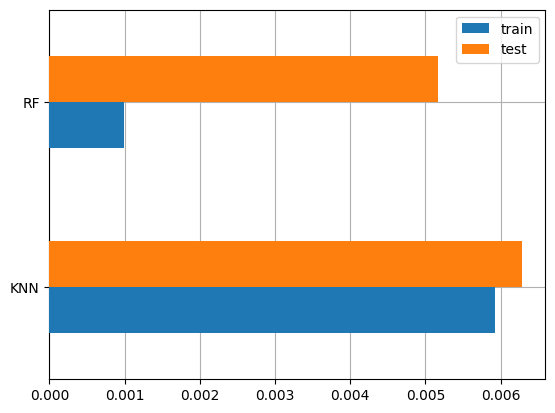

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Melakukan prediksi pada data uji dan memvisualisasikan hasilnya melalui DataFrame untuk melihat seberapa besar perbedaan hasil poin yang sebenarnya dengan yang diprediksi

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_KNN
3293,65,65.2,65.4
